<a href="https://colab.research.google.com/github/siaSim/keras_deeplearning/blob/main/Multiclass_classification2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

뉴스 기사 분류 : 다중 분류 문제

In [1]:
import matplotlib.pyplot as plt

4.2.1 로이터 데이터셋

In [2]:
from tensorflow.keras.datasets import reuters

(train_data, train_labels),(test_data, test_labels)=reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire=" ".join([reverse_word_index.get(i-3, "?") for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [6]:
train_labels[10]

3

4.2.2 데이터 준비

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
 results=np.zeros((len(sequences), dimension))
 for i, sequence in enumerate(sequences):
  for j in sequence:
    results[i, j]=1.
 return results
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

In [8]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label]=1.
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [9]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(train_labels)
y_test=to_categorical(test_labels)

4.2.3 모델 구성

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [11]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

4.2.4 훈련 검증

In [12]:
x_val = x_train[:1000]
partial_x_train =x_train[1000:]
y_val=y_train[:1000]
partial_y_train = y_train[1000:]

In [13]:
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 75ms/step - loss: 2.6312 - accuracy: 0.5137 - val_loss: 1.7530 - val_accuracy: 0.6390
Epoch 2/20
16/16 [==============================] - 1s 59ms/step - loss: 1.4865 - accuracy: 0.6880 - val_loss: 1.3474 - val_accuracy: 0.6970
Epoch 3/20
16/16 [==============================] - 1s 60ms/step - loss: 1.1405 - accuracy: 0.7503 - val_loss: 1.1675 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 44ms/step - loss: 0.9330 - accuracy: 0.7989 - val_loss: 1.0579 - val_accuracy: 0.7720
Epoch 5/20
16/16 [==============================] - 1s 52ms/step - loss: 0.7689 - accuracy: 0.8325 - val_loss: 1.0313 - val_accuracy: 0.7740
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: 0.6383 - accuracy: 0.8626 - val_loss: 0.9393 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 1s 57ms/step - loss: 0.5310 - accuracy: 0.8895 - val_loss: 0.9082 - val_accuracy: 0.8080
Epoch 8/20
16

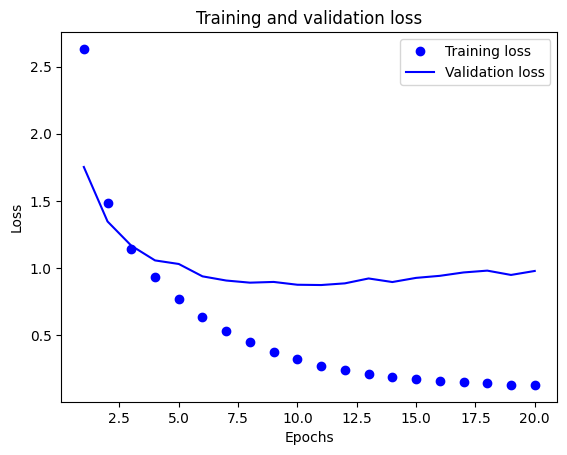

In [14]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

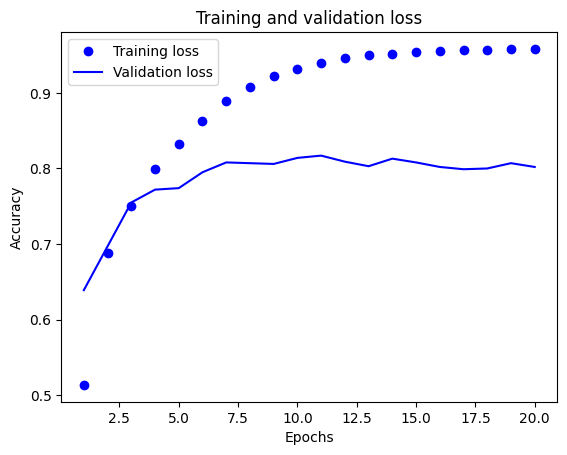

In [15]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training loss")
plt.plot(epochs, val_acc, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [16]:
model=keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 1s 29ms/step - loss: 2.4959 - accuracy: 0.4619
Epoch 2/9
18/18 [==============================] - 0s 26ms/step - loss: 1.4728 - accuracy: 0.6795
Epoch 3/9
18/18 [==============================] - 0s 25ms/step - loss: 1.1679 - accuracy: 0.7423
Epoch 4/9
18/18 [==============================] - 0s 25ms/step - loss: 0.9670 - accuracy: 0.7914
Epoch 5/9
18/18 [==============================] - 0s 26ms/step - loss: 0.8023 - accuracy: 0.8258
Epoch 6/9
18/18 [==============================] - 0s 26ms/step - loss: 0.6703 - accuracy: 0.8525
Epoch 7/9
18/18 [==============================] - 0s 25ms/step - loss: 0.5638 - accuracy: 0.8773
Epoch 8/9
18/18 [==============================] - 0s 26ms/step - loss: 0.4764 - accuracy: 0.8937
Epoch 9/9
71/71 [==============================] - 0s 2ms/step - loss: 0.9136 - accuracy: 0.7943


In [17]:
results

[0.9136162996292114, 0.7943009734153748]

In [18]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.17853962600178094

새로운 데이터에 대해 예측하기

In [19]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 2ms/step


In [20]:
predictions[0].shape

(46,)

In [21]:
np.sum(predictions[0])

0.9999999

In [22]:
np.argmax(predictions[0])

3

레이블과 손실을 다루는 다른 방법

In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [24]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

충분히 큰 중간층을 두어야 하는 이유

In [25]:
model = keras.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 1s 15ms/step - loss: 3.2413 - accuracy: 0.1168 - val_loss: 2.6245 - val_accuracy: 0.2690
Epoch 2/20
63/63 [==============================] - 1s 13ms/step - loss: 2.0769 - accuracy: 0.4648 - val_loss: 1.7235 - val_accuracy: 0.5870
Epoch 3/20
63/63 [==============================] - 1s 12ms/step - loss: 1.5646 - accuracy: 0.5948 - val_loss: 1.5799 - val_accuracy: 0.5920
Epoch 4/20
63/63 [==============================] - 1s 10ms/step - loss: 1.4076 - accuracy: 0.6034 - val_loss: 1.4967 - val_accuracy: 0.5920
Epoch 5/20
63/63 [==============================] - 1s 10ms/step - loss: 1.3021 - accuracy: 0.6196 - val_loss: 1.4685 - val_accuracy: 0.5990
Epoch 6/20
63/63 [==============================] - 1s 11ms/step - loss: 1.2147 - accuracy: 0.6505 - val_loss: 1.4295 - val_accuracy: 0.6240
Epoch 7/20
63/63 [==============================] - 1s 10ms/step - loss: 1.1375 - accuracy: 0.6817 - val_loss: 1.4017 - val_accuracy: 0.6380
Epoch 8/20
63